In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [10]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std = 0.4)

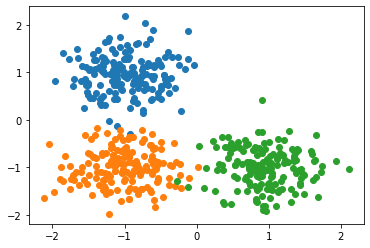

In [11]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [12]:
y_cat = to_categorical(y, 3)
print(y_cat)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [13]:
model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
h = model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 28us/step - loss: 0.0250 - accuracy: 0.9880
Epoch 2/100
500/500 [==============================] - 0s 30us/step - loss: 0.0249 - accuracy: 0.9900
Epoch 3/100
500/500 [==============================] - 0s 30us/step - loss: 0.0246 - accuracy: 0.9900
Epoch 4/100
500/500 [==============================] - 0s 44us/step - loss: 0.0244 - accuracy: 0.9920
Epoch 5/100
500/500 [==============================] - 0s 36us/step - loss: 0.0247 - accuracy: 0.9880
Epoch 6/100
500/500 [==============================] - 0s 34us/step - loss: 0.0244 - accuracy: 0.9880
Epoch 7/100
500/500 [==============================] - 0s 38us/step - loss: 0.0249 - accuracy: 0.9900
Epoch 8/100
500/500 [==============================] - 0s 38us/step - loss: 0.0247 - accuracy: 0.9900
Epoch 9/100
500/500 [==============================] - 0s 38us/step - loss: 0.0243 - accuracy: 0.9900
Epoch 10/100
500/500 [==============================] - 0s 30us/step - loss: 0.024

500/500 [==============================] - 0s 18us/step - loss: 0.0240 - accuracy: 0.9900
Epoch 81/100
500/500 [==============================] - 0s 30us/step - loss: 0.0251 - accuracy: 0.9900
Epoch 82/100
500/500 [==============================] - 0s 22us/step - loss: 0.0241 - accuracy: 0.9920
Epoch 83/100
500/500 [==============================] - 0s 26us/step - loss: 0.0241 - accuracy: 0.9900
Epoch 84/100
500/500 [==============================] - 0s 24us/step - loss: 0.0238 - accuracy: 0.9900
Epoch 85/100
500/500 [==============================] - 0s 28us/step - loss: 0.0240 - accuracy: 0.9920
Epoch 86/100
500/500 [==============================] - 0s 22us/step - loss: 0.0245 - accuracy: 0.9920
Epoch 87/100
500/500 [==============================] - 0s 16us/step - loss: 0.0255 - accuracy: 0.9880
Epoch 88/100
500/500 [==============================] - 0s 18us/step - loss: 0.0239 - accuracy: 0.9900
Epoch 89/100
500/500 [==============================] - 0s 20us/step - loss: 0.0242 - 

Text(0.5, 1.0, 'accuracy')

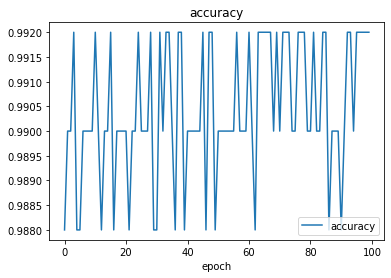

In [17]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

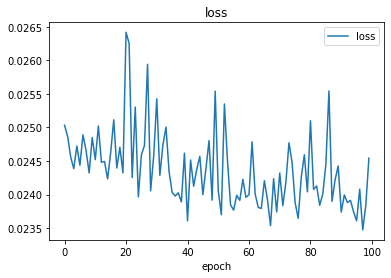

In [18]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [20]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

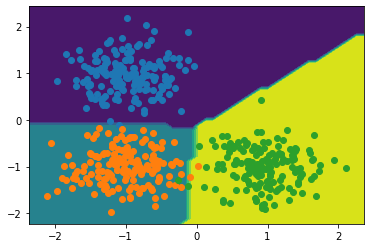

In [22]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])